<a href="https://colab.research.google.com/github/Tonmf/ProyectoIML/blob/master/Casos/Caso1_b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Reporte de MLT de Barcelona Telco

##Problema a solucionar

Con el dataset de eficiencia de Edificios:
  
    Genera un modelo que se capaz de predecir la energía necesaria para: Calentar y enfriar la casa.


## Data


Cargamos las librerias

In [ ]:
import os              # Package to use directory command to list files
import numpy as np     # linear algebra
import pandas as pd    # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns  # Used for plotting the graph
import matplotlib.pyplot as plt
import re

from scipy import stats # for Statistics
from statistics import mean
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from matplotlib import rcParams

Accedemos al drive para extraer el excel con los datos

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
data = pd.read_excel('/content/gdrive/My Drive/IML/Proyecto Final/Dataset/ENB2012_data.xlsx')
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


##Data Exploration

Observamos si hay algun dato con vacio.

In [ ]:
totalt = data.isnull().sum().sort_values(ascending=False)
percent = ( data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([totalt, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
Y2,0,0.0
Y1,0,0.0
X8,0,0.0
X7,0,0.0
X6,0,0.0
X5,0,0.0
X4,0,0.0
X3,0,0.0
X2,0,0.0
X1,0,0.0


Observamos varias caracteristicas del dataset

In [ ]:
data.shape

(768, 10)

In [ ]:
data.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'Y1', 'Y2'], dtype='object')

In [ ]:
data.dtypes

X1    float64
X2    float64
X3    float64
X4    float64
X5    float64
X6      int64
X7    float64
X8      int64
Y1    float64
Y2    float64
dtype: object

In [ ]:
data['Y1'].describe()

count    768.000000
mean      22.307195
std       10.090204
min        6.010000
25%       12.992500
50%       18.950000
75%       31.667500
max       43.100000
Name: Y1, dtype: float64

In [ ]:
data['Y2'].describe()

count    768.000000
mean      24.587760
std        9.513306
min       10.900000
25%       15.620000
50%       22.080000
75%       33.132500
max       48.030000
Name: Y2, dtype: float64

In [ ]:
data.loc[data['Y2'].max()]

X1      0.98
X2    514.50
X3    294.00
X4    110.25
X5      7.00
X6      2.00
X7      0.10
X8      1.00
Y1     24.00
Y2     26.00
Name: 48, dtype: float64

Los datos estan limpios y vamos a proceder a entrenarlos

###Visualización

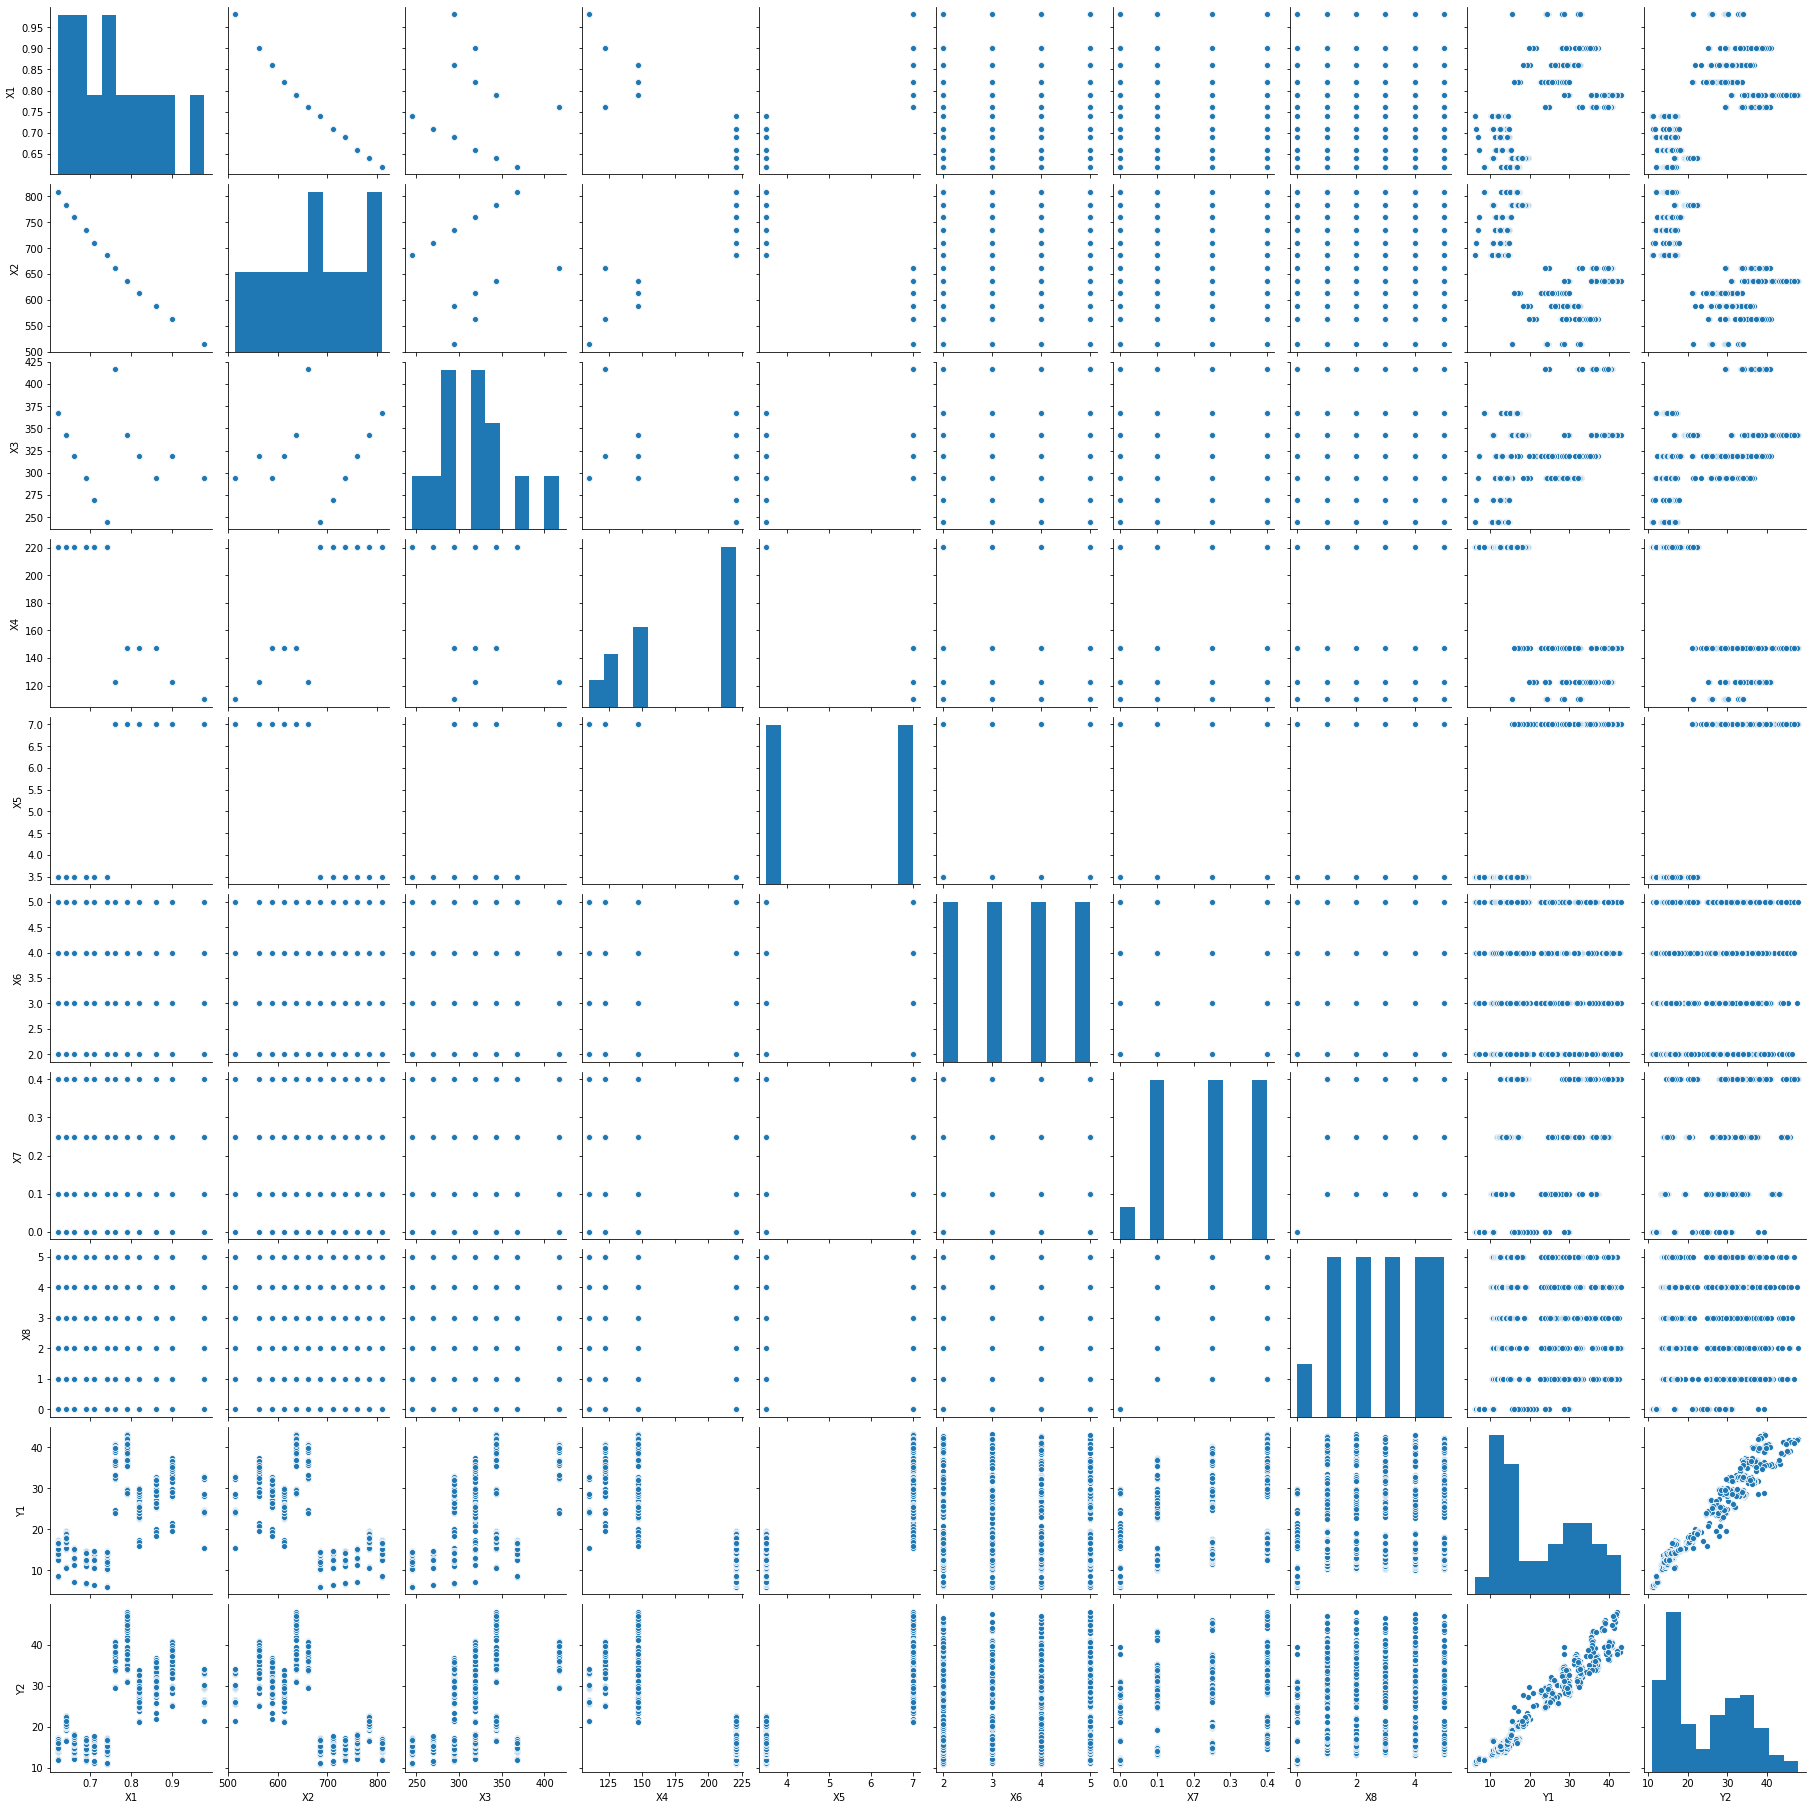

In [ ]:
import pandas as pd
import seaborn as sns
sns.pairplot(data)
plt.show()

## Algoritmo Machine Learning

In [ ]:
data.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'Y1', 'Y2'], dtype='object')

In [ ]:
data=data*100

In [ ]:
data['Y1']=data['Y1'].astype(int)

In [ ]:
data['Y1']

0      1555
1      1555
2      1555
3      1555
4      2084
       ... 
763    1788
764    1654
765    1644
766    1648
767    1664
Name: Y1, Length: 768, dtype: int64

###Random Forest

In [ ]:
from sklearn.preprocessing import StandardScaler
target = data['Y1'].values

select_features = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']


scaler = StandardScaler()
dfScaled = scaler.fit_transform(data[select_features])

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(dfScaled, target, test_size=0.2, random_state=42)

In [ ]:
y_train.dtype

dtype('int64')

In [ ]:
from sklearn.ensemble import RandomForestClassifier  # importing model to use for our prediction
from sklearn.metrics import classification_report
#n_estimators: Numero de arboles del randomforest.
#mas_depth: Profindidad maxima de los arboles.
#min_samples_split:El número mínimo de muestras necesarias para dividir un nodo interno
RFC = RandomForestClassifier(max_depth = 15, min_samples_split = 2, n_estimators = 15,random_state = 20, n_jobs = -1)
RFC.fit(x_train, y_train) 
train_prediction = RFC.predict(x_train)
print("La accuracy de Y1 es de {}.".format(accuracy_score(y_train,train_prediction)))

La accuracy de Y1 es de 0.9837133550488599.


In [ ]:
data['Y2']=data['Y2'].astype(int)

In [ ]:
data['Y2']

0      21
1      21
2      21
3      21
4      28
       ..
763    21
764    16
765    17
766    16
767    16
Name: Y2, Length: 768, dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler
target = data['Y2'].values

select_features = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']


scaler = StandardScaler()
dfScaled= scaler.fit_transform(data[select_features])

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train1, y_test = train_test_split(dfScaled, target, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier  # importing model to use for our prediction
from sklearn.metrics import classification_report
#n_estimators: Numero de arboles del randomforest.
#mas_depth: Profindidad maxima de los arboles.
#min_samples_split:El número mínimo de muestras necesarias para dividir un nodo interno
RFC = RandomForestClassifier(max_depth = 15, min_samples_split = 2, n_estimators = 15,random_state = 20, n_jobs = -1)
RFC.fit(x_train, y_train1) 
train_prediction1 = RFC.predict(x_train)

###Adaboost

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
target = data['Y1'].values

select_features = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']


scaler = StandardScaler()
dfScaled = scaler.fit_transform(data[select_features])
x_train, x_test, y_train, y_test = train_test_split(dfScaled, target, test_size=0.3, random_state=42)

In [ ]:
boost = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth = 10, max_leaf_nodes=40),n_estimators=50,learning_rate=0.5,algorithm='SAMME')
boost.fit(x_train, y_train)

y_pred = boost.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 67.97%


In [ ]:
target = data['Y2'].values

select_features = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']


scaler = StandardScaler()
dfScaled = scaler.fit_transform(data[select_features])
x_train, x_test, y_train, y_test = train_test_split(dfScaled, target, test_size=0.3, random_state=42)

In [ ]:
boost = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth = 10, max_leaf_nodes=40),n_estimators=50,learning_rate=0.5,algorithm='SAMME')
boost.fit(x_train, y_train)

y_pred = boost.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 68.40%


## Resultados

In [ ]:
print("La accuracy de Y1 es de {}.".format(accuracy_score(y_train,train_prediction)))
print("La accuracy de Y2 es de {}.".format(accuracy_score(y_train1,train_prediction1)))

La accuracy de Y1 es de 0.9837133550488599.
La accuracy de Y2 es de 0.99185667752443.


##Discusión y Conclusiones

Obtenemos mayor precisión ejecutando un random Forest en los dos casos.